<a href="https://colab.research.google.com/github/soumyaonikeri/Board_Game_with_Loaded_Dice/blob/main/YOLOV5_SAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL.Image as Image
import torch
import torchvision.transforms as transforms
from tqdm import tqdm

In [2]:
!git clone https://github.com/ultralytics/yolov5


Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Counting objects: 100% (217/217), done.
remote: Compressing objects: 100% (147/147), done.
remote: Total 17022 (delta 122), reused 129 (delta 70), pack-reused 16805 (from 1)
Receiving objects: 100% (17022/17022), 15.75 MiB | 12.37 MiB/s, done.
Resolving deltas: 100% (11655/11655), done.


In [3]:
%cd yolov5

/content/yolov5


In [4]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 56.3 MB/s eta 0:00:00


In [5]:
import sys
from pathlib import Path

In [6]:
import torch
from models.common import DetectMultiBackend

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
!pip install ultralytics

In [8]:
from pathlib import Path

# Create a path that's compatible with your OS
model_path = Path("/content/yolov5/best.pt")

In [9]:
import platform
import pathlib

# Check the operating system and set the appropriate path type
if platform.system() == 'Windows':
    pathlib.PosixPath = pathlib.WindowsPath
else:
    pathlib.WindowsPath = pathlib.PosixPath

# Load the model
model = DetectMultiBackend("/content/yolov5/best.pt")

Fusing layers... 
Model summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs


In [10]:
img_dir = '/content/yolov5/1_cast_ok_0_167.jpeg'  #1005216151.jpg' #10459869.jpg #'/kaggle/input/flickr-image-dataset/flickr30k_images/flickr30k_images/1000092795.jpg'
img = cv2.imread(img_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_det = img.copy()

In [11]:
import cv2
import torch
import matplotlib.pyplot as plt

# Load your custom model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/best.pt', force_reload=True)

# Load and resize the image
img_dir = "/content/yolov5/1_cast_ok_0_167.jpeg"  # Update with your actual image path
img = cv2.imread(img_dir)
height, width = img.shape[:2]
new_height = (height // 32) * 32
new_width = (width // 32) * 32
resized_img = cv2.resize(img, (new_width, new_height))

# Convert image to RGB if needed
img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

# Run YOLO detection
results = model(img_rgb)

# Extract detection results
boxes = results.xyxy[0]  # xyxy format [x1, y1, x2, y2, confidence, class]

# Draw the bounding boxes on the original image
for *xyxy, conf, cls in boxes:
    x1, y1, x2, y2 = map(int, xyxy)
    label = f"{results.names[int(cls)]} {conf:.2f}"
    cv2.rectangle(resized_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(resized_img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert back to RGB for displaying with matplotlib
resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(resized_img_rgb)
plt.axis('off')
plt.show()


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 
/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
WARNING ⚠️ NMS time limit 0.550s exceeded


In [12]:
import cv2
import torch
import matplotlib.pyplot as plt

# Load your custom model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/best.pt', force_reload=True)

# Load and validate the image path
img_dir = "/content/yolov5/1_cast_ok_0_167.jpeg"  # Update with your actual image path
img = cv2.imread(img_dir)

if img is None:
    raise FileNotFoundError(f"Image not found at path: {img_dir}")

# Resize image dimensions to be multiples of 32
height, width = img.shape[:2]
new_height = (height // 32) * 32
new_width = (width // 32) * 32
resized_img = cv2.resize(img, (new_width, new_height))

# Convert image to RGB format (YOLOv5 expects RGB input)
img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

# Run YOLO detection (without time_limit)
results = model(img_rgb)

# Extract detection results
boxes = results.xyxy[0]  # xyxy format [x1, y1, x2, y2, confidence, class]

# Draw the bounding boxes on the original image
for *xyxy, conf, cls in boxes:
    x1, y1, x2, y2 = map(int, xyxy)
    label = f"{results.names[int(cls)]} {conf:.2f}"
    cv2.rectangle(resized_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(resized_img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert the image back to RGB for matplotlib
resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(resized_img_rgb)
plt.axis('off')  # Hide axes
plt.show()


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 
/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [13]:
# get predicted bounding boxes into SAM input format
results_df = results.pandas().xyxy[0]
result_list = list()
for idx, row in results_df.iterrows():
    bbox = np.array([row.xmin,row.ymin,row.xmax,row.ymax], dtype=int).tolist()
    result_list.append(bbox)
bboxes = result_list
bboxes

[[16, 13, 272, 266]]

In [14]:
!pip install git+https://github.com/facebookresearch/segment-anything.git


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-ztg9ex3l
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-ztg9ex3l
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=50e5e8854cd44345411645a90b405a8857a7aaa3ff8b685e5464faa99f6b30ba
  Stored in directory: /tmp/pip-ephem-wheel-cache-sdndii_a/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment_anything


In [15]:
from transformers import SamModel, SamProcessor
from segment_anything import SamPredictor, sam_model_registry

class Segmentor():
    def __init__(self, checkpoint_path = None, device = 'cuda'):
        self.processor = SamProcessor.from_pretrained("facebook/sam-vit-base")
        self.device = device
        self.model = SamModel.from_pretrained("facebook/sam-vit-base")
        if checkpoint_path is not None:
            checkpoint = torch.load(checkpoint_path, map_location=device)
            self.model.load_state_dict(checkpoint['model_state_dict'])
        self.model = self.model.to(device)

    def inference(self, inputs):
        with torch.no_grad():
            outputs = self.model(pixel_values=inputs["pixel_values"].to(self.device),
                          input_boxes=inputs["input_boxes"].to(self.device),
                          multimask_output=False)

        predicted_masks = outputs.pred_masks.squeeze(1)
        predicted_masks = np.array((predicted_masks.detach().cpu() > 0.), dtype=np.uint8).squeeze()

        return predicted_masks

In [16]:
device = 'cuda'
segmentor = Segmentor(device = device)

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/375M [00:00<?, ?B/s]

In [17]:
im2tensor = transforms.ToTensor()

# enlarge the size of the bboxes on all sides to give more space for the segmentation
# and clip the padded bboxes to not exceed the image edges
def preprocess_inputs(img, bboxes):
    img_tensor = im2tensor(img)
    img_size = img_tensor.shape

    bboxes_pad = [-10.,-10.,10.,10.]
    lower_clip = np.zeros(4)
    higher_clip  = [img_size[2],img_size[1],img_size[2],img_size[1]]

    bboxes_padded = np.array(bboxes, dtype=np.float32)+bboxes_pad
    bboxes_out = np.clip(bboxes_padded, lower_clip, higher_clip).tolist()

    return img_tensor, bboxes_out

# turn back the prediction image to the input's original size
def postprocess_output(img, out_shape):
    out_width, out_height = out_shape[-2:]
    max_length = max(out_width, out_height)

    img_out = cv2.resize(img, (max_length, max_length), interpolation = cv2.INTER_LINEAR)
    img_out = img_out[0:out_width, 0:out_height]
    return img_out

In [18]:
# feed the inputs to the SAM processor and inference to generate the prediction

img_inp, bboxes_inp= preprocess_inputs(img, bboxes)
img_inp_shape = img_inp.shape

inputs = segmentor.processor(img_inp, input_boxes=[bboxes_inp], return_tensors="pt",do_rescale=False)
preds = segmentor.inference(inputs)

if len(preds.shape)!=3:
    preds = [preds]

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

  0%|          | 0/1 [00:00<?, ?it/s]

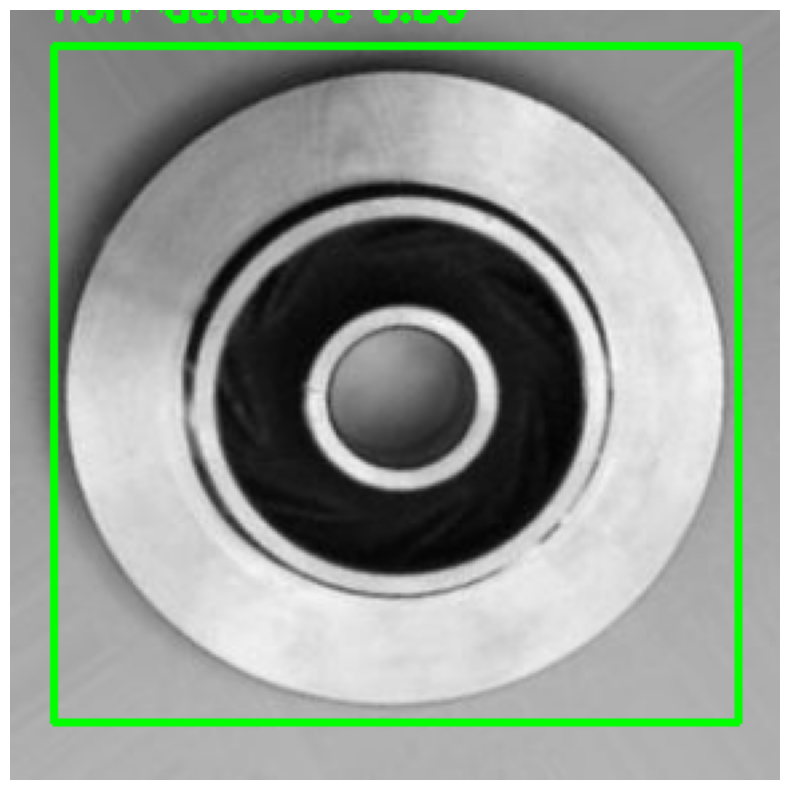

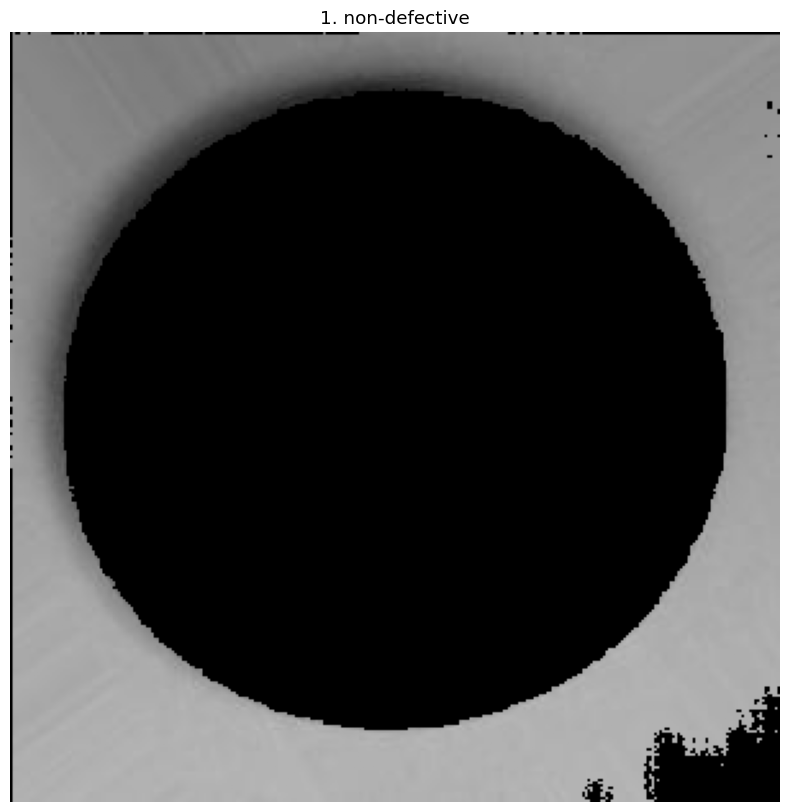

In [20]:
# postprocess each prediction then mask the original image with the binary prediction
# and display the results

pred_labels = results_df.name.tolist()
for idx, (pred,pred_label) in tqdm(enumerate(zip(preds,pred_labels)), total=len(preds), leave=False):
    pred_post = postprocess_output(pred, img_inp_shape)
    plt.imshow(np.transpose(img_inp*pred_post,(1,2,0)))
    plt.title(str(idx+1)+". "+pred_label)
    plt.show()

  0%|          | 0/1 [00:00<?, ?it/s]

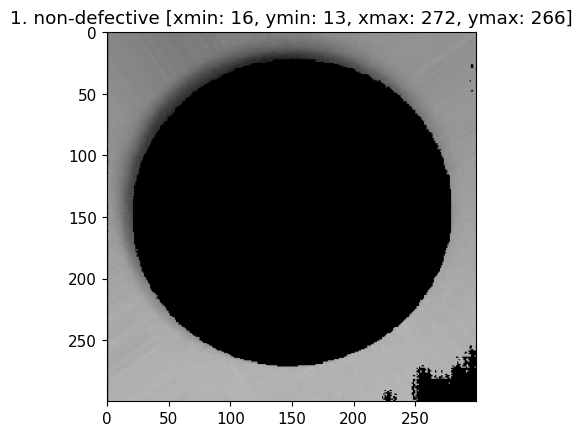

In [24]:
# Assuming preds and pred_labels contain the predictions and their labels
for idx, (pred, pred_label) in tqdm(enumerate(zip(preds, pred_labels)), total=len(preds), leave=False):
    # Postprocess the prediction (you may need to adjust this based on your use case)
    pred_post = postprocess_output(pred, img_inp_shape)

    # Plot the image with the postprocessed prediction
    plt.imshow(np.transpose(img_inp * pred_post, (1, 2, 0)))

    # Get the bounding box values
    row = results_df.iloc[idx]
    xmin, ymin, xmax, ymax = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])

    # Add title with label and bounding box info
    plt.title(f"{idx+1}. {pred_label} [xmin: {xmin}, ymin: {ymin}, xmax: {xmax}, ymax: {ymax}]")
    plt.show()


In [25]:
import numpy as np

# Function to calculate IoU
def calculate_iou(bbox_pred, bbox_gt):
    # Get coordinates for the intersection box
    x_left = max(bbox_pred[0], bbox_gt[0])
    y_top = max(bbox_pred[1], bbox_gt[1])
    x_right = min(bbox_pred[2], bbox_gt[2])
    y_bottom = min(bbox_pred[3], bbox_gt[3])

    # Check if there is no intersection
    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # Compute the area of intersection
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # Compute the area of both the predicted and ground truth boxes
    pred_area = (bbox_pred[2] - bbox_pred[0]) * (bbox_pred[3] - bbox_pred[1])
    gt_area = (bbox_gt[2] - bbox_gt[0]) * (bbox_gt[3] - bbox_gt[1])

    # Compute the union area
    union_area = pred_area + gt_area - intersection_area

    # Compute IoU
    iou = intersection_area / union_area
    return iou

# Bounding box values: [xmin, ymin, xmax, ymax]
pred_bbox = [16, 13, 272, 266]  # Predicted bounding box
gt_bbox = [15, 19, 273, 266]    # Ground truth bounding box

# Calculate IoU
iou = calculate_iou(pred_bbox, gt_bbox)
print(f"IoU: {iou:.2f}")

# Confusion matrix evaluation
iou_threshold = 0.5  # Define IoU threshold (commonly used value is 0.5)

# Initialize confusion matrix variables
TP, FP, FN = 0, 0, 0

if iou >= iou_threshold:
    TP += 1
else:
    FP += 1
    FN += 1  # Assume if it's not a TP, it's a miss (adjust based on your use case)

# Print confusion matrix results
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Calculate accuracy as the ratio of correct predictions (TP) to total predictions (TP + FP + FN)
accuracy = TP / (TP + FP + FN)
print(f"Accuracy: {accuracy:.2f}")


IoU: 0.97
True Positives (TP): 1
False Positives (FP): 0
False Negatives (FN): 0
Accuracy: 1.00


In [26]:
import numpy as np

# Function to calculate IoU
def calculate_iou(bbox_pred, bbox_gt):
    x_left = max(bbox_pred[0], bbox_gt[0])
    y_top = max(bbox_pred[1], bbox_gt[1])
    x_right = min(bbox_pred[2], bbox_gt[2])
    y_bottom = min(bbox_pred[3], bbox_gt[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    pred_area = (bbox_pred[2] - bbox_pred[0]) * (bbox_pred[3] - bbox_pred[1])
    gt_area = (bbox_gt[2] - bbox_gt[0]) * (bbox_gt[3] - bbox_gt[1])

    union_area = pred_area + gt_area - intersection_area
    return intersection_area / union_area

# Bounding box values: [xmin, ymin, xmax, ymax]
pred_bbox = [16, 13, 272, 266]  # Predicted bounding box
gt_bbox = [15, 19, 273, 266]    # Ground truth bounding box

# Calculate IoU
iou = calculate_iou(pred_bbox, gt_bbox)
print(f"IoU: {iou:.2f}")

# Initialize confusion matrix variables
TP, FP, FN = 0, 0, 0
iou_threshold = 0.5  # Define IoU threshold

if iou >= iou_threshold:
    TP += 1  # True Positive
else:
    FP += 1  # False Positive
    FN += 1  # False Negative

# Print confusion matrix results
print(f"Confusion Matrix:")
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Create a confusion matrix
confusion_matrix = np.array([[TP, FN],
                              [FP, 0]])  # We don't typically use True Negatives (TN) in object detection

print("\nConfusion Matrix:")
print(confusion_matrix)

# Calculate accuracy
accuracy = TP / (TP + FP + FN) if (TP + FP + FN) > 0 else 0
print(f"Accuracy: {accuracy:.2f}")


IoU: 0.97
Confusion Matrix:
True Positives (TP): 1
False Positives (FP): 0
False Negatives (FN): 0

Confusion Matrix:
[[1 0]
 [0 0]]
Accuracy: 1.00
